In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
emnist = pd.read_csv('datasets/emnist-byclass-train.csv')
emnist.shape

(697931, 785)

In [3]:
x_data = emnist.drop('35', axis=1)
x_data.shape

(697931, 784)

In [4]:
y_data = emnist['35']
y_data.shape

(697931,)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(523448, 784)
(174483, 784)
(523448,)
(174483,)


In [15]:
x_train_np = x_train.values
x_test_np = x_test.values
y_train_np = y_train.values
y_test_np = y_test.values
print(x_train_np.shape)
print(x_test_np.shape)
print(y_train_np.shape)
print(y_test_np.shape)

(523448, 784)
(174483, 784)
(523448,)
(174483,)


In [17]:
x_train_np_4d = x_train_np.reshape(x_train_np.shape[0], 28, 28, 1).astype('float32')
x_test_np_4d = x_test_np.reshape(x_test_np.shape[0], 28, 28, 1).astype('float32')
print(x_train_np_4d.shape)
print(x_test_np_4d.shape)

(523448, 28, 28, 1)
(174483, 28, 28, 1)


In [20]:
x_train_normalize = x_train_np_4d / 255
x_test_normalize = x_test_np_4d / 255
print(x_train_normalize.shape)
print(x_test_normalize.shape)

(523448, 28, 28, 1)
(174483, 28, 28, 1)


In [19]:
from keras.utils import np_utils
y_train_one_hot = np_utils.to_categorical(y_train)
y_test_one_hot = np_utils.to_categorical(y_test)
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

Using TensorFlow backend.


(523448, 62)
(174483, 62)


In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(filters = 16,
                 kernel_size = (5, 5),
                 padding = 'same',
                 input_shape = (28, 28, 1),
                 activation = 'relu',
               ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 36,
                 kernel_size = (5, 5),
                 padding = 'same',
#                  input_shape = (28, 28, 1),
                 activation = 'relu',
               ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(62, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               225920    
__________

In [54]:
# %%time
# model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# train_history = model.fit(x = x_train_normalize[:len(x_train_normalize)//10], y = y_train_one_hot[:len(y_train_one_hot)//10], validation_split = 0.2, epochs = 30, batch_size = 300, verbose = 2)

In [55]:
model.save('model4.h5')
scores = model.evaluate(x_test_normalize, y_test_one_hot)
print(scores)

174483/174483 [==============================] - 106s 608us/step
[0.44495571990453603, 0.8419788747334652]


In [45]:
# from keras.models import load_model
# model = load_model('model2.h5')
# scores = model.evaluate(x_test_normalize, y_test_one_hot)
# print(scores)

174483/174483 [==============================] - 117s 668us/step
[0.45571298204017324, 0.8422425107299965]


In [46]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend([train, validation])
    plt.show()

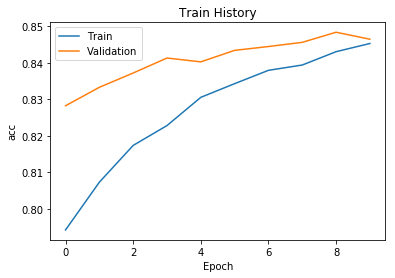

In [47]:
show_process(train_history, 'acc', 'val_acc')

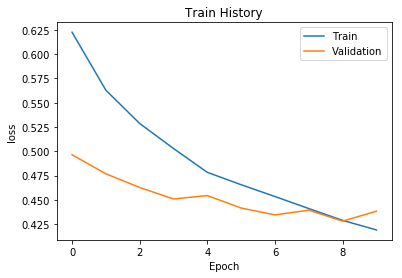

In [48]:
show_process(train_history, 'loss', 'val_loss')

In [58]:
np.argmax(y_test_one_hot[0])

8

In [60]:
a = x_train_normalize[0]

In [61]:
a

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
img = img.reshape(28, 28)
plt.imshow(img)
plt.show()